# Análise estatística dos dados

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import scipy.stats as stats
import scipy.special as scsp
from scipy.stats import ksone
import seaborn as sns
import math
import statsmodels.api as sm
import pylab as py
import random
from plotnine import *
from sklearn.preprocessing import StandardScaler

In [244]:
df = pd.read_csv('vacine_tweets_completoDezJanFevTratado.csv')

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Apelido      2122 non-null   object
 1   Username     2114 non-null   object
 2   Data/Hora    2125 non-null   object
 3   Respondendo  2125 non-null   object
 4   Texto        1143 non-null   object
 5   link_img     2125 non-null   object
 6   Comentarios  2125 non-null   int64 
 7   Retweets     2125 non-null   int64 
 8   Likes        2125 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 149.5+ KB


In [247]:
df.head(10)

,Apelido,Username,Data/Hora,Respondendo,Texto,link_img,Comentarios,Retweets,Likes
0,Eder Morselli,@edermorselli,2020-11-30T23:54:49.000Z,A pandemia não acabou... Vamos nos proteger......,NaN,https://pbs.twimg.com/media/EoHB4fVXMAEdkk5?fo...,0,1,1
1,V,@VR_SSC,2020-11-30T23:53:24.000Z,Em resposta a \n@KooperHD,Os caras tacam capa variante logo quando a kug...,https://abs-0.twimg.com/emoji/v2/72x72/1f643.png,0,0,2
2,Lucas França,@FrancaComAmor,2020-11-30T23:53:32.000Z,Publico na \n@RevistaEpoca\n um papo que tive ...,Covid-19: Quem deve receber primeiro a vacina?...,https://pbs.twimg.com/card_img/136204193687451...,0,6,27
3,calcinha chromatica,@fckwithmyselff,2020-11-30T23:52:55.000Z,eu só penso nela (a vacina),NaN,https://pbs.twimg.com/media/EoHBcUKWEAEcXHx?fo...,1,4,4
4,Rafa_SCH,@RafaSCHk,2020-11-30T23:54:43.000Z,"Difícil, mas acho que pegaria a variante",Comentar o Tweet\nKooper // 110K no Youtube\n@...,https://pbs.twimg.com/profile_images/129763947...,0,0,1
5,sereia,@AnjinhoJuu,2020-11-30T23:55:54.000Z,vai jacare jacare \ncomprei um lança p baforar...,Comentar o Tweet\n𝐩𝐞𝐝𝐫𝐨\n@Crf_pedrolcs\n · 30 ...,https://pbs.twimg.com/profile_images/134771989...,1,0,1
6,danka ୭̥⋆*｡,@offfluencer,2020-11-30T23:57:52.000Z,11 amigas p recriar essa dps da vacina?,NaN,https://pbs.twimg.com/media/EoHClIRXMAUBcNM?fo...,6,0,13
7,amandoim,@lmxcncoarreaga,2020-11-30T23:46:30.000Z,a vacina tá sendo desenvolvida rápido por cont...,Comentar o Tweet\nCONTIGO!\n@tocontigo\n · 30 ...,https://pbs.twimg.com/profile_images/925778444...,0,0,5
8,Victor Zenatti,@ZenattiVictor,2020-11-30T23:57:14.000Z,"Pra iniciar dezembro com energias ótimas, com ...",NaN,https://pbs.twimg.com/media/EoHCcBaWEAMrHmL?fo...,0,0,2
9,CNN Brasil,@CNNBrasil,2020-11-30T23:29:05.000Z,Documentos obtidos com exclusividade pela CNN ...,NaN,https://pbs.twimg.com/media/EoG7_hWVkAMxG-Y?fo...,2100,2200,7800


In [3]:
df_red = df[['Comentarios', 'Retweets', 'Likes']].copy()

In [5]:
df_red.describe()

,Comentarios,Retweets,Likes
count,2125.000000,2125.000000,2125.000000
mean,35.097882,50.677176,262.157647
std,277.683715,376.650455,1894.068522
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000
50%,1.000000,1.000000,7.000000
75%,2.000000,5.000000,27.000000
max,6200.000000,9900.000000,47800.000000


### Média

In [4]:
print(df_red['Likes'].mean())
print(df_red['Retweets'].mean())
print(df_red['Comentarios'].mean())

262.15764705882356
50.677176470588236
35.09788235294118


### Mediana

In [5]:
print(df_red['Likes'].median())
print(df_red['Comentarios'].median())
print(df_red['Retweets'].median())

7.0
1.0
1.0


## Estimativa de variabilidade (Medidas de dispersão)

### Desvio

In [6]:
media_likes = df_red['Likes'].mean()
media_ret = df_red['Retweets'].mean()
media_com = df_red['Comentarios'].mean()

In [7]:
d = df_red['Likes'].apply(lambda x: x - media_likes)
d

0      -261.157647
1      -260.157647
2      -235.157647
3      -258.157647
4      -261.157647
           ...    
2120   -262.157647
2121   -186.157647
2122   -262.157647
2123   -262.157647
2124   -260.157647
Name: Likes, Length: 2125, dtype: float64

In [8]:
d = df_red['Retweets'].apply(lambda x: x - media_ret)
d

0      -49.677176
1      -50.677176
2      -44.677176
3      -46.677176
4      -50.677176
          ...    
2120   -50.677176
2121   -35.677176
2122   -50.677176
2123   -50.677176
2124   -49.677176
Name: Retweets, Length: 2125, dtype: float64

In [9]:
d = df_red['Comentarios'].apply(lambda x: x - media_com)
d

0      -35.097882
1      -35.097882
2      -35.097882
3      -34.097882
4      -35.097882
          ...    
2120   -35.097882
2121   -27.097882
2122   -35.097882
2123   -35.097882
2124   -34.097882
Name: Comentarios, Length: 2125, dtype: float64

### Desvio absoluto médio

In [10]:
print(df_red['Likes'].mad())
print(df_red['Retweets'].mad())
print(df_red['Comentarios'].mad())

442.5119933564084
86.75883847750724
61.48903595847936


In [11]:
print(df_red['Likes'].var())
print(df_red['Retweets'].var())
print(df_red['Comentarios'].var())

3587495.565060349
141865.56522743055
77108.24559344162


### Boxplots

#### Likes

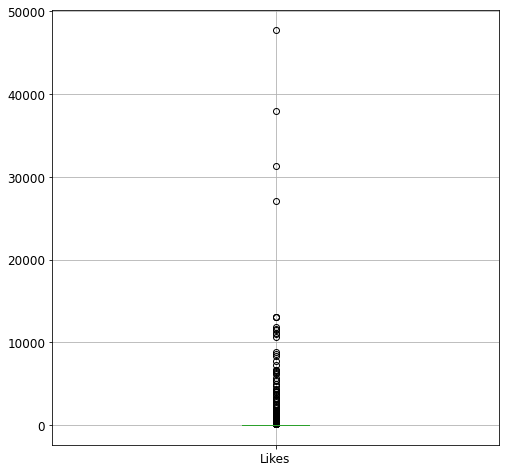

In [14]:
df_red.boxplot(column=['Likes'], fontsize='large', figsize=(8,8))

#### Retweets

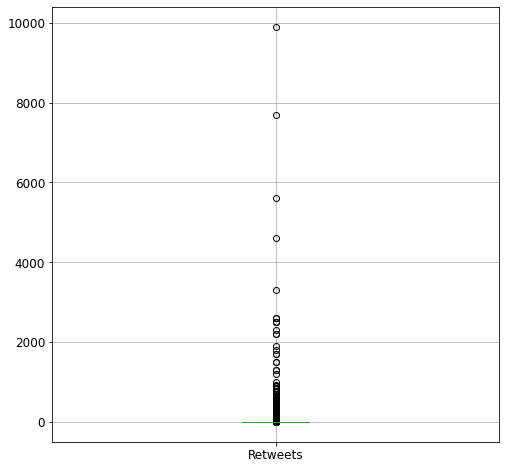

In [28]:
df_red.boxplot(column=['Retweets'], fontsize='large', figsize=(8,8))

#### Comentários

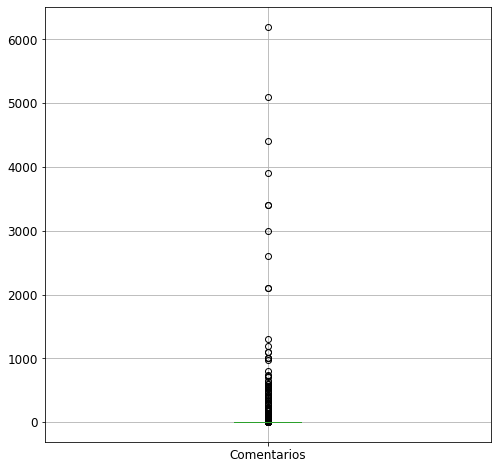

In [29]:
df_red.boxplot(column=['Comentarios'], fontsize='large', figsize=(8,8))

### Histograma

In [12]:
# calculando bins
k_likes = math.ceil(1 + 3.3 * math.log10( df_red['Likes'].size ))
k_ret = math.ceil(1 + 3.3 * math.log10( df_red['Retweets'].size ))
k_com = math.ceil(1 + 3.3 * math.log10( df_red['Comentarios'].size ))

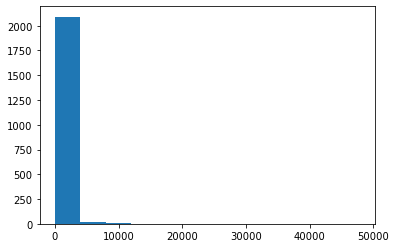

In [13]:
import matplotlib.pyplot as plt
plt.hist(df_red['Likes'], bins=k_likes)
plt.show()

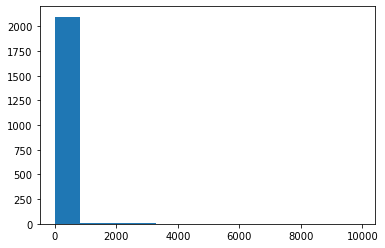

In [14]:
import matplotlib.pyplot as plt
plt.hist(df_red['Retweets'], bins=k_ret)
plt.show()

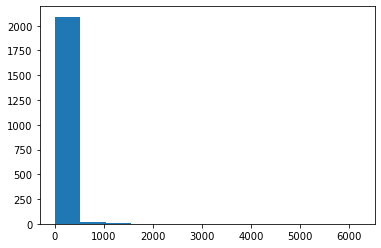

In [15]:
import matplotlib.pyplot as plt
plt.hist(df_red['Comentarios'], bins=k_com)
plt.show()

### Correlações

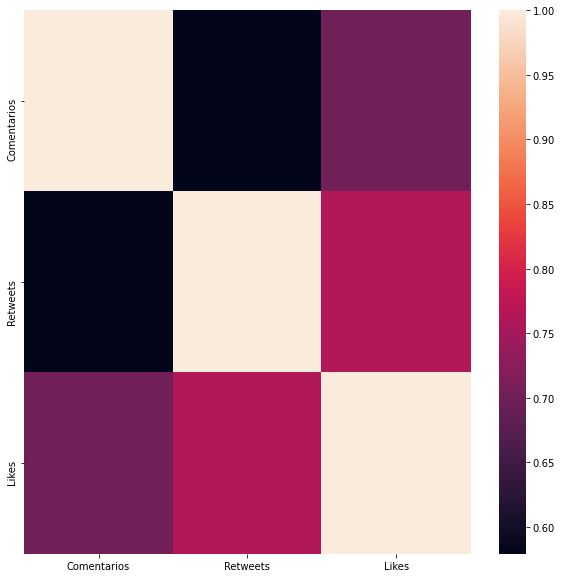

In [16]:
%matplotlib inline
plt.figure(figsize=(10,10)) 
sns.heatmap(df_red.corr(method='spearman'))

- Utilizando o método de spearman pois neste ponto desconheço a distribuição dos dados.<br />
- Vemos que a maior correlação se da entre Likes e Retweets

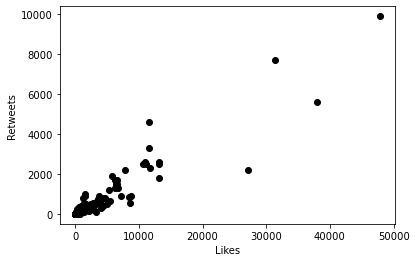

In [17]:
plt.scatter(df_red['Likes'], df_red['Retweets'], c='k')

plt.xlabel("Likes")
plt.ylabel("Retweets")

plt.show()

In [97]:
df.query('Likes > 40000')

,Apelido,Username,Data/Hora,Respondendo,Texto,link_img,Comentarios,Retweets,Likes
258,Eixo Político,@eixopolitico,2020-12-14T16:33:16.000Z,"Hoje, nos Estados Unidos.",NaN,https://pbs.twimg.com/media/EpNjEq4XIAQ_wZH?fo...,431,9900,47800


## Boostrap

In [18]:
likes = df_red['Likes'].tolist()
comentarios = df_red['Comentarios'].tolist()
retweets = df_red['Retweets'].tolist()

In [19]:
print(np.median(likes))
print(np.median(comentarios))
print(np.median(retweets))

7.0
1.0
1.0


#### Teorema do limite central usando bootstrap

In [20]:
sample_mean_likes = []
sample_mean_com = []
sample_mean_ret = []

# Bootstrap sampling

for i in range(80):
    y = random.sample(likes, 5)
    avg = np.median(y)
    sample_mean_likes.append(np.round(avg,0))

for i in range(80):
    y = random.sample(comentarios, 5)
    avg = np.median(y)
    sample_mean_com.append(np.round(avg,0))
    
for i in range(80):
    y = random.sample(retweets, 5)
    avg = np.median(y)
    sample_mean_ret.append(np.round(avg,0))

In [248]:
sample_mean_likes

[6.0,
 10.0,
 130.0,
 6.0,
 14.0,
 4.0,
 2.0,
 27.0,
 3.0,
 11.0,
 5.0,
 27.0,
 21.0,
 3.0,
 6.0,
 12.0,
 2.0,
 10.0,
 3.0,
 2.0,
 19.0,
 6.0,
 21.0,
 0.0,
 4.0,
 4.0,
 14.0,
 5.0,
 3.0,
 9.0,
 16.0,
 7.0,
 27.0,
 3.0,
 13.0,
 3.0,
 38.0,
 10.0,
 15.0,
 1.0,
 6.0,
 2.0,
 2.0,
 10.0,
 38.0,
 21.0,
 19.0,
 7.0,
 2.0,
 5.0,
 5.0,
 3.0,
 2.0,
 25.0,
 2.0,
 16.0,
 2.0,
 3.0,
 3.0,
 10.0,
 10.0,
 3.0,
 3.0,
 2.0,
 3.0,
 10.0,
 10.0,
 7.0,
 9.0,
 3.0,
 3.0,
 183.0,
 10.0,
 15.0,
 5.0,
 6.0,
 11.0,
 6.0,
 5.0,
 5.0]

In [249]:
print(np.median(sample_mean_likes))
print(np.median(sample_mean_com))
print(np.median(sample_mean_ret))

6.0
1.0
1.0


#### Histograma das medianas gerada pela amostra

##### Likes

In [22]:
k = math.ceil(1 + 3.3 * math.log10(len(sample_mean_likes)))
k

8

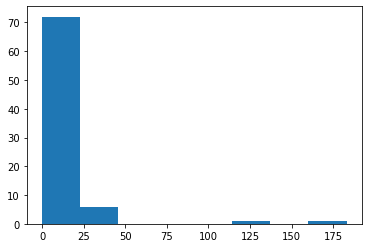

In [23]:
plt.hist(sample_mean_likes, bins=k) 
plt.show()

##### Comentarios

In [24]:
k = math.ceil(1 + 3.3 * math.log10(len(sample_mean_com)))
k

8

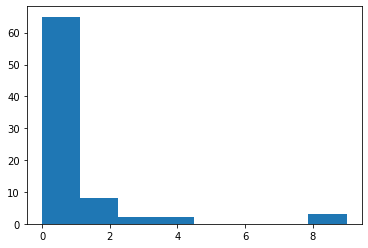

In [25]:
plt.hist(sample_mean_com, bins=k) 
plt.show()

##### Retweets

In [26]:
k = math.ceil(1 + 3.3 * math.log10(len(sample_mean_ret)))
k

8

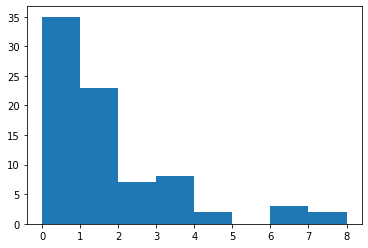

In [27]:
plt.hist(sample_mean_ret, bins=k) 
plt.show()

### Distribuição normal

In [28]:
freq_df_likes = df_red.groupby('Likes').size().reset_index(name='Fabs')
freq_df_com = df_red.groupby('Comentarios').size().reset_index(name='Fabs')
freq_df_ret = df_red.groupby('Retweets').size().reset_index(name='Fabs')

In [250]:
length = freq_df_likes['Likes']
labels = freq_df_likes['Fabs']

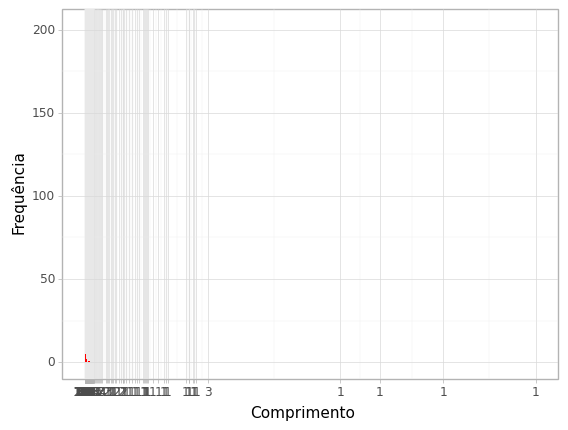

<ggplot: (129791315411)>

In [251]:
(ggplot(freq_df_likes, aes(freq_df_likes['Likes'],'Fabs'))
  + geom_col(fill='red')
  + scale_x_continuous(breaks=length, labels=labels)
  + theme_light()
  + xlab('Comprimento')
  + ylab('Frequência')
)

### Distribuição normal de amostras

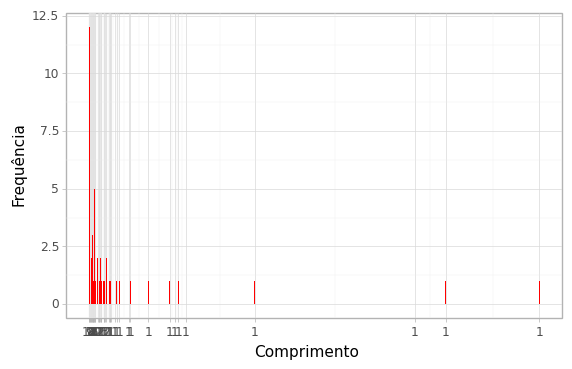

<ggplot: (129789851880)>

In [32]:
rs_likes = random.sample(likes, 100)

df_rs_likes = pd.DataFrame(np.array(rs_likes), columns = list("a"))
df_rs_likes.rename(columns={'a': 'Likes'}, inplace = True)

filtro = df_rs_likes['Likes'] < 1000
df_rs_likes = df_rs_likes[filtro]

freq_df_likes = df_rs_likes.groupby('Likes').size().reset_index(name='Fabs')
#freq_df_com = df_red.groupby('Comentarios').size().reset_index(name='Fabs')
#freq_df_ret = df_red.groupby('Retweets').size().reset_index(name='Fabs')

length = freq_df_likes['Likes']
labels = freq_df_likes['Fabs']

(ggplot(freq_df_likes, aes(freq_df_likes['Likes'],'Fabs'))
  + geom_col(fill='red')
  + scale_x_continuous(breaks=length, labels=labels)
  + theme_light()
  + xlab('Comprimento')
  + ylab('Frequência')
  + coord_fixed(ratio=50)
)

### Aplicando normalização z-score

In [33]:
df_red_z = stats.zscore(df_red['Likes'])
df_red_z

array([-0.13791429, -0.1373862 , -0.124184  , ..., -0.13844238,
       -0.13844238, -0.1373862 ])

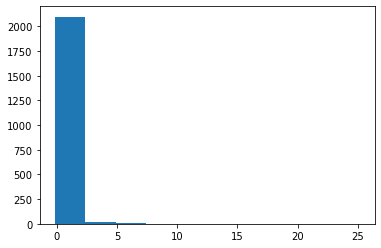

In [34]:
plt.hist(df_red_z) 
plt.show()

#### QQPlot

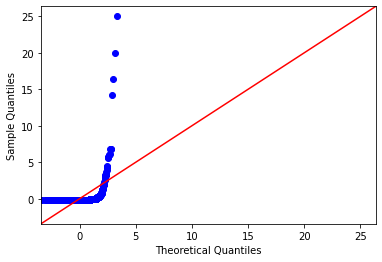

In [35]:
sm.qqplot(df_red_z, line ='45') 
py.show()

### Transformação logarítimica

#### scaterplot de relação entre Likes e Retweets orginal

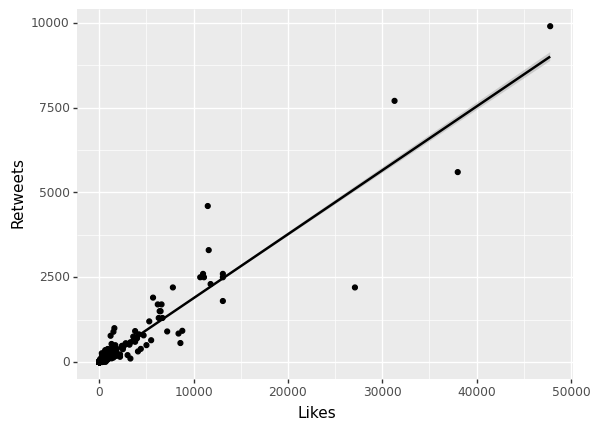

<ggplot: (129791438629)>

In [36]:
(ggplot(df_red, aes(df_red['Likes'], df_red['Retweets']))
+ geom_point() #### scaterplot de relação entre Likes e Retweets orginal
+ geom_smooth(method='lm')
)

#### scaterplot de relação entre Likes e Retweets aplicando logaritmo

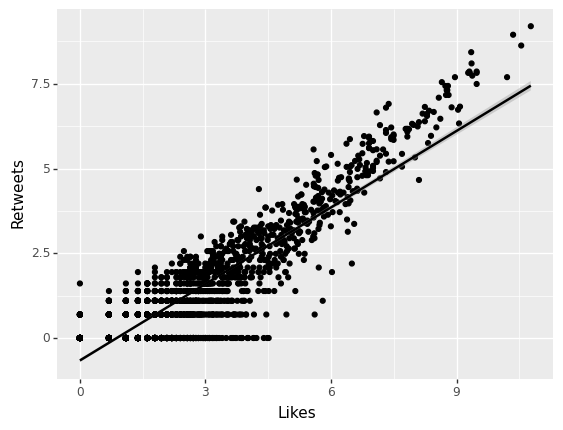

<ggplot: (129791438734)>

In [37]:
(ggplot(df_red, aes(np.log(df_red['Likes']+1), np.log(df_red['Retweets']+1)))
+ geom_point() #### scaterplot de relação entre Likes e Retweets orginal
+ geom_smooth(method='lm')
)

#### Histograma dos dados normalizados por transformação logaritmica

In [38]:
k = math.ceil(1 + 3.3 * math.log10( df_red['Likes'].size ))
k

12

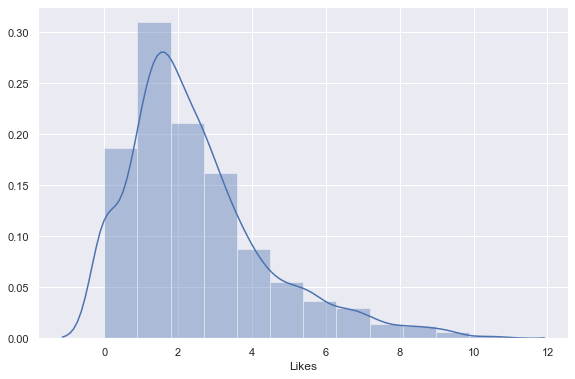

In [104]:
#plt.hist(np.log(df_red['Likes']+1), bins=k)
#plt.show()

sns.set(rc={'figure.figsize':(9.5,6.1)})
sns.distplot(np.log(df_red['Likes']+1), bins=k) # Dis - média ponderada das distâncias a cinco centros de empregos de Boston.
plt.show()

### Teste de normalidade

In [252]:
freq_df_likes = df_red.groupby('Likes').size().reset_index(name='Fabs')
freq_df_likes['Fac'] = freq_df_likes['Fabs'].cumsum()
freq_df_likes['Frac'] = freq_df_likes['Fac']/freq_df_likes['Fac'].max()

mean = df_red.mean()
std = df_red.std()

freq_df_likes['Zi'] = 0
freq_df_likes['Zi'] = freq_df_likes['Likes'].apply(lambda x: (x - mean)/std)

freq_df_likes

,Likes,Fabs,Fac,Frac,Zi
0,0,202,202,0.095059,-0.126395
1,1,155,357,0.168000,-0.122794
2,2,189,546,0.256941,-0.119193
3,3,162,708,0.333176,-0.115592
4,4,137,845,0.397647,-0.111990
...,...,...,...,...,...
301,13100,3,2121,0.998118,47.049580
302,27100,1,2122,0.998588,97.466652
303,31300,1,2123,0.999059,112.591774
304,38000,1,2124,0.999529,136.719945


In [253]:
def zScoreToPvalue(z):
    # Retornar p-value a partir do z-score
    return 0.5 * (1 + scsp.erf(z / np.sqrt(2)))

In [254]:
freq_df_likes['FracEsp'] = freq_df_likes['Zi'].apply(lambda x: zScoreToPvalue(x))
freq_df_likes['D_negativo'] = abs(freq_df_likes['FracEsp']-freq_df_likes['Frac'])
freq_df_likes['D_positivo'] = 0

In [255]:
for i in range(freq_df_likes['Frac'].shape[0]):
    if i > 0:
        freq_df_likes['D_positivo'].iloc[i] = freq_df_likes['FracEsp'].iloc[i] - freq_df_likes['Frac'].iloc[i-1]
    else:
        freq_df_likes['D_positivo'].iloc[i] = freq_df_likes['FracEsp'].iloc[i]

C:\Users\romul\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [256]:
freq_df_likes

,Likes,Fabs,Fac,Frac,Zi,FracEsp,D_negativo,D_positivo
0,0,202,202,0.095059,-0.126395,0.449710,0.354651,0.449710
1,1,155,357,0.168000,-0.122794,0.451135,0.283135,0.356076
2,2,189,546,0.256941,-0.119193,0.452561,0.195620,0.284561
3,3,162,708,0.333176,-0.115592,0.453988,0.120812,0.197047
4,4,137,845,0.397647,-0.111990,0.455416,0.057768,0.122239
...,...,...,...,...,...,...,...,...
301,13100,3,2121,0.998118,47.049580,1.000000,0.001882,0.003294
302,27100,1,2122,0.998588,97.466652,1.000000,0.001412,0.001882
303,31300,1,2123,0.999059,112.591774,1.000000,0.000941,0.001412
304,38000,1,2124,0.999529,136.719945,1.000000,0.000471,0.000941


In [257]:
D = ( freq_df_likes[['D_negativo','D_positivo']].max() ).max()

def ks_critical_value(n_trials, alpha):
    return ksone.ppf(1-alpha/2, n_trials)

p_value = ks_critical_value(df_red.shape[0], 0.05)

if D < p_value:
    print('Os dados seguem uma distribuição normal')
else:
    print('Os dados não seguem uma distribuição normal')

Os dados não seguem uma distribuição normal


### Best fit distribution

In [95]:
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = scipy.stats.kstest(y_std, distribution, args=param)
        else:
            D, p = scipy.stats.kstest(y_std, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

#### Likes

In [258]:
y_std = scipy.stats.zscore(df_red['Likes'])
y_std = y_std.flatten()

check_distribution(dist_names, y_std)

C:\Users\romul\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
C:\Users\romul\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
0          beta  0.273142  1.415208e-140  no
6             t  0.293969  3.253705e-163  no
5      pearson3  0.405089  1.551992e-315  no
9   weibull_min  0.405335  6.181634e-316  no
1         expon  0.658573   0.000000e+00  no
2         gamma  0.761865   0.000000e+00  no
3       lognorm  0.417314   0.000000e+00  no
4          norm  0.419581   0.000000e+00  no
7        triang  0.924918   0.000000e+00  no
8       uniform  0.943105   0.000000e+00  no
10  weibull_max  0.428557   0.000000e+00  no


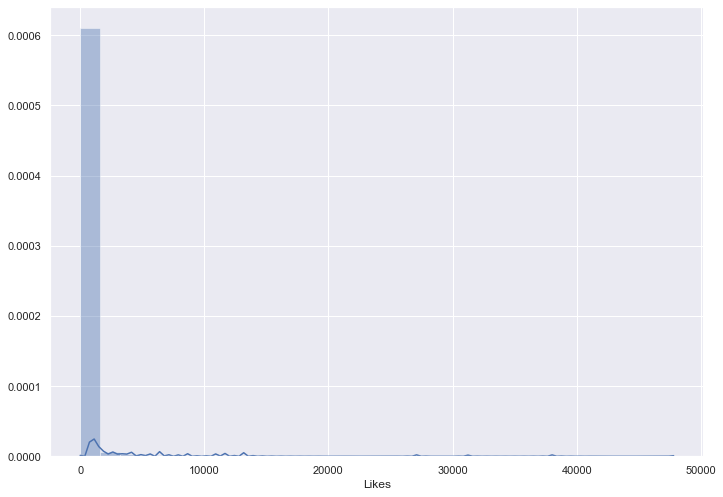

In [89]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_red['Likes'], bins=30) # Dis - média ponderada das distâncias a cinco centros de empregos de Boston.
plt.show()

#### Comentarios

In [90]:
y_std = scipy.stats.zscore(df_red['Comentarios'])
y_std = y_std.flatten()

check_distribution(dist_names, y_std)#### Likes

C:\Users\romul\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
C:\Users\romul\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
0          beta  0.389941  1.643199e-291  no
1         expon  0.716758   0.000000e+00  no
2         gamma  0.411412   0.000000e+00  no
3       lognorm  0.455763   0.000000e+00  no
4          norm  0.439635   0.000000e+00  no
5      pearson3  0.455916   0.000000e+00  no
6             t  0.543926   0.000000e+00  no
7        triang  0.792695   0.000000e+00  no
8       uniform  0.945510   0.000000e+00  no
9   weibull_min  0.456000   0.000000e+00  no
10  weibull_max  0.868582   0.000000e+00  no


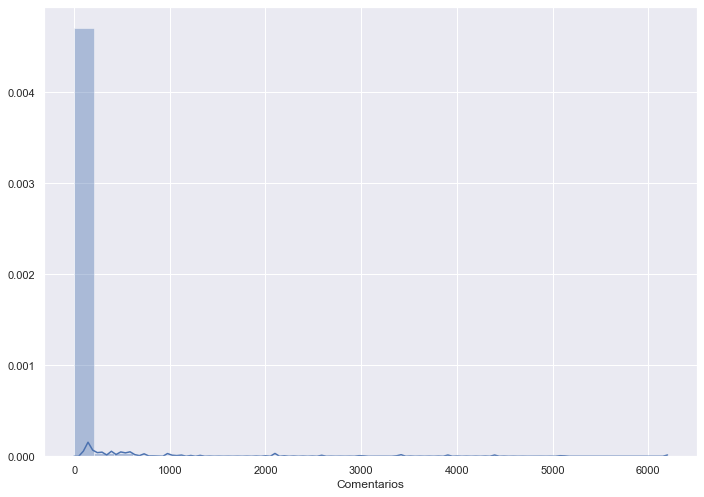

In [92]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_red['Comentarios'], bins=30) # Dis - média ponderada das distâncias a cinco centros de empregos de Boston.
plt.show()

#### Retweets

In [93]:
y_std = scipy.stats.zscore(df_red['Retweets'])
y_std = y_std.flatten()

check_distribution(dist_names, y_std)

C:\Users\romul\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
C:\Users\romul\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
0          beta  0.298978  6.290558e-169  no
3       lognorm  0.402145  8.777784e-311  no
1         expon  0.677050   0.000000e+00  no
2         gamma  0.482301   0.000000e+00  no
4          norm  0.424954   0.000000e+00  no
5      pearson3  0.494131   0.000000e+00  no
6             t  0.587761   0.000000e+00  no
7        triang  0.928510   0.000000e+00  no
8       uniform  0.943565   0.000000e+00  no
9   weibull_min  0.412230   0.000000e+00  no
10  weibull_max  0.889565   0.000000e+00  no


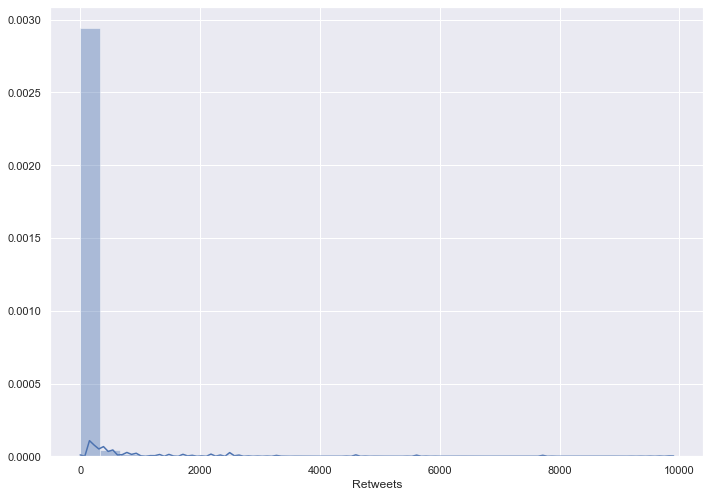

In [94]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_red['Retweets'], bins=30) # Dis - média ponderada das distâncias a cinco centros de empregos de Boston.
plt.show()

### Testando a melhor distribuição após aplicar transformação logarítmica

#### Likes

C:\Users\romul\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance       p_value  D<p
4          norm  0.000000  1.000000e+00  yes
3       lognorm  0.118866  1.282210e-26   no
6             t  0.126170  6.028230e-30   no
5      pearson3  0.168000  6.780302e-53   no
1         expon  0.168000  6.780302e-53   no
2         gamma  0.181410  1.145539e-61   no
7        triang  0.196592  1.949501e-72   no
9   weibull_min  0.225009  5.192754e-95   no
0          beta  0.536614  0.000000e+00   no
8       uniform  0.457259  0.000000e+00   no
10  weibull_max  0.759664  0.000000e+00   no


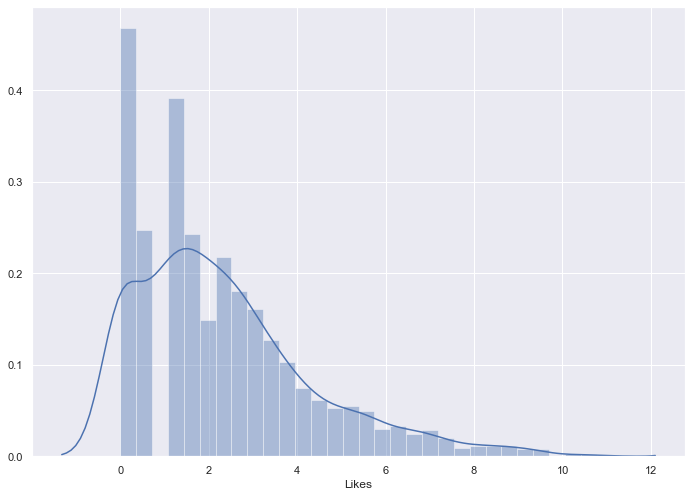

In [199]:
log_s = np.log(df_red['Likes'])
log = log_s.to_numpy()
y_std = log.flatten()

log_s.to_frame()
log_s[log_s < 1e-308] = 0 #removendo valores -infinitos

check_distribution(dist_names, log_s)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(log_s, bins=30) # Dis - média ponderada das distâncias a cinco centros de empregos de Boston.
plt.show()

#### Retweets

C:\Users\romul\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
C:\Users\romul\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
4          norm  0.065176   1.360840e-08  no
10  weibull_max  0.343982  4.880902e-225  no
0          beta  0.565176   0.000000e+00  no
1         expon  0.565176   0.000000e+00  no
2         gamma  0.565176   0.000000e+00  no
3       lognorm  0.565176   0.000000e+00  no
5      pearson3  0.565176   0.000000e+00  no
6             t  0.434824   0.000000e+00  no
7        triang  0.423309   0.000000e+00  no
8       uniform  0.593956   0.000000e+00  no
9   weibull_min  0.565176   0.000000e+00  no


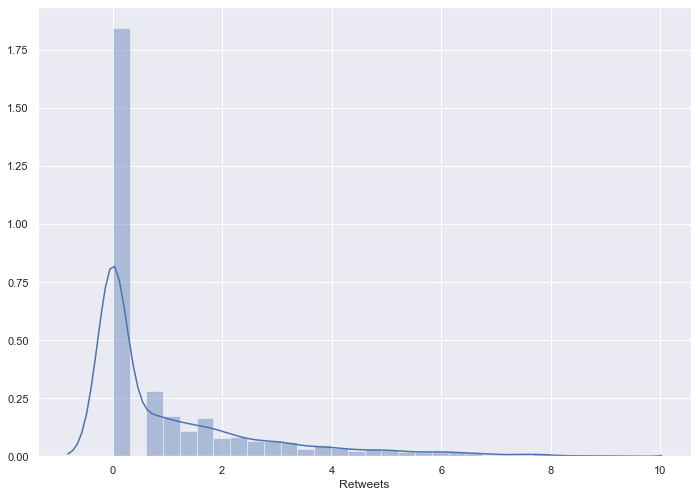

In [201]:
log_s_r = np.log(df_red['Retweets'])
log_r = log_s.to_numpy()
y_std_r = log.flatten()

log_s.to_frame()
log_s_r[log_s_r < 1e-308] = 0 #removendo valores -infinitos

check_distribution(dist_names, log_s_r)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(log_s_r, bins=30) # Dis - média ponderada das distâncias a cinco centros de empregos de Boston.
plt.show()

C:\Users\romul\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
C:\Users\romul\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
C:\Users\romul\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance       p_value D<p
4          norm  0.174353  2.889288e-57  no
0          beta  0.662956  0.000000e+00  no
1         expon  0.674353  0.000000e+00  no
2         gamma  0.674350  0.000000e+00  no
3       lognorm  0.663052  0.000000e+00  no
5      pearson3  0.674353  0.000000e+00  no
6             t  0.541641  0.000000e+00  no
7        triang  0.674341  0.000000e+00  no
8       uniform  0.674353  0.000000e+00  no
9   weibull_min  0.674353  0.000000e+00  no
10  weibull_max  0.425037  0.000000e+00  no


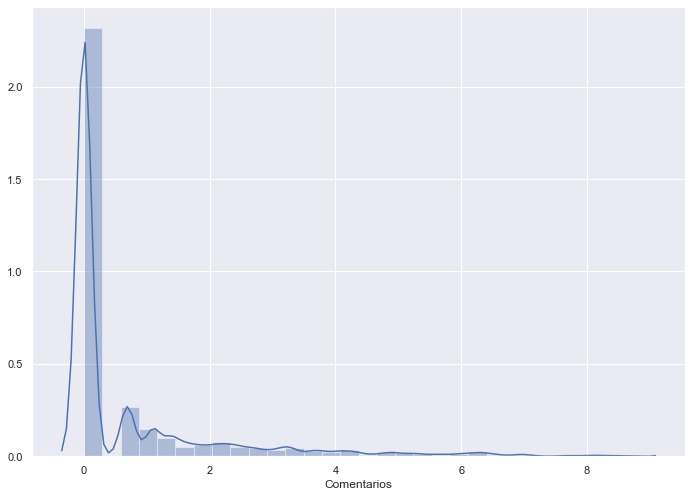

In [259]:
log_s = np.log(df_red['Comentarios'])
log = log_s.to_numpy()
y_std = log.flatten()

log_s.to_frame()
log_s[log_s < 1e-308] = 0 #removendo valores -infinitos

check_distribution(dist_names, log_s)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(log_s, bins=30) # Dis - média ponderada das distâncias a cinco centros de empregos de Boston.
plt.show()

### Mapa de correlação após transformação logaritmica

In [208]:
#log_s['Retweets'] = log_s_r

log_s.rename(columns={[0]: "Likes"})
print(log_s)

%matplotlib inline
plt.figure(figsize=(10,10)) 
sns.heatmap(df_concat.corr(method='spearman'))

TypeError: unhashable type: 'list'

## Word Cloud

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud

In [214]:
df_word = df[['Respondendo', 'Texto']].copy()

In [215]:
df_word.dropna(subset=['Respondendo'], axis=0, inplace = True)
df_word.dropna(subset=['Texto'], axis=0, inplace = True)

In [216]:
respondendo = df_word['Respondendo']
texto = df_word['Texto']

In [222]:
all_respondendo = " ".join(s for s in respondendo)
all_texto = " ".join(s for s in texto)
all = all_respondendo+all_texto

In [213]:
stopwords = set(STOPWORDS)

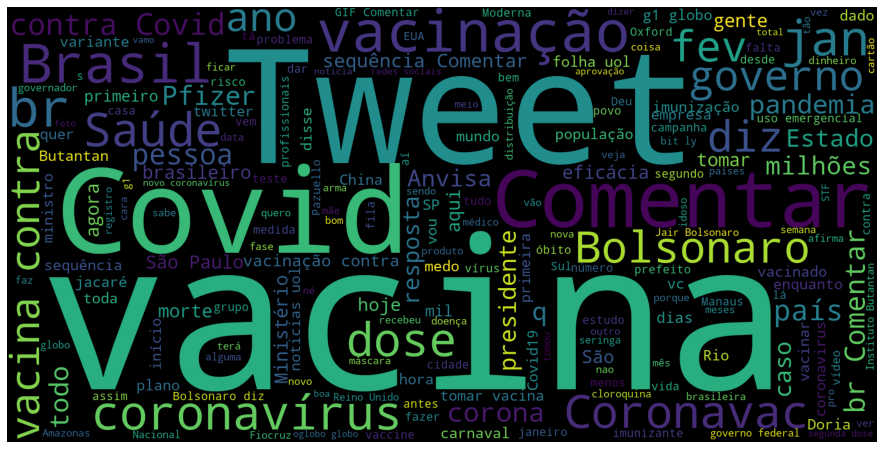

In [242]:
stopwords.update(["https","dia","ainda","vai","após","sobre","mostrar","pode","p","maior","pra","da", "meu", "em", "você", "de", "ao", "os", "que", "e","se","por","mais","não","sim","já","dez","uma","um",])
import io
palavras = set()
f= io.open("stopwords.txt", "r", encoding="utf8")
with f as arq:
    for linha in arq: # para cada linha do arquivo
        for palavra in linha.split(' '): # para cada palavra da linha
            palavras.add(palavra) # adiciona a palavra no set
            
stopwords.update(palavras)

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(all)

fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file('wordcloud.png',);